In [1]:
import pickle
import matplotlib.pyplot as plt

import sys 
sys.path.append('../../')
from explainer.single_variable_explainer import SingleVariableExplainer
from explainer.explainer import Explainer


In [2]:
with open('../models/mimic-ii/model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('../models/mimic-ii/train_X.pkl', 'rb') as f:
    train_X = pickle.load(f)

In [3]:
model.feature_names_in_

array(['age', 'bmi', 'weight_first', 'icu_los_day', 'hospital_los_day',
       'day_icu_intime_num', 'hour_icu_intime', 'map_1st', 'hr_1st',
       'temp_1st', 'spo2_1st', 'abg_count', 'wbc_first', 'hgb_first',
       'platelet_first', 'sodium_first', 'potassium_first', 'tco2_first',
       'chloride_first', 'bun_first', 'creatinine_first'], dtype=object)

In [4]:
list(model.feature_names_in_)

['age',
 'bmi',
 'weight_first',
 'icu_los_day',
 'hospital_los_day',
 'day_icu_intime_num',
 'hour_icu_intime',
 'map_1st',
 'hr_1st',
 'temp_1st',
 'spo2_1st',
 'abg_count',
 'wbc_first',
 'hgb_first',
 'platelet_first',
 'sodium_first',
 'potassium_first',
 'tco2_first',
 'chloride_first',
 'bun_first',
 'creatinine_first']

In [5]:
explainer = Explainer(
    underlying_model=model,
    training_dataset=train_X,
    target_variable='day_28_flg',
    variables=['age', 'bmi', 'weight_first', 'wbc_first']
)

In [10]:
explainer.explain(
    train_X.iloc[0],
    additional_threshold=0.25
)

(('bmi', 'wbc_first', 'weight_first', 'age'),
 {(): 0.01474553411679681,
  ('age',): 0.07384738451263306,
  ('bmi',): 0.1718743441962992,
  ('weight_first',): 0.013124172494298942,
  ('wbc_first',): 0.27450703474892324,
  ('wbc_first', 'age'): 0.564627787586296,
  ('wbc_first', 'bmi'): 0.6088880456147884,
  ('wbc_first', 'weight_first'): 0.26707467213586156,
  ('wbc_first', 'bmi', 'age'): 0.7170015180776848,
  ('wbc_first', 'bmi', 'weight_first'): 0.5938888380870382,
  ('wbc_first', 'bmi', 'age', 'weight_first'): 0.6910866427965243,
  ('wbc_first', 'bmi', 'weight_first', 'age'): 0.7344365287188628,
  ('wbc_first', 'age', 'bmi'): 0.7200733949768234,
  ('wbc_first', 'age', 'weight_first'): 0.701961560162174,
  ('wbc_first', 'age', 'bmi', 'weight_first'): 0.7233569060451326,
  ('wbc_first', 'age', 'weight_first', 'bmi'): 0.7359670975235819,
  ('wbc_first', 'weight_first', 'age'): 0.7338178493495884,
  ('wbc_first', 'weight_first', 'bmi'): 0.7359670975235819,
  ('wbc_first', 'weight_first'

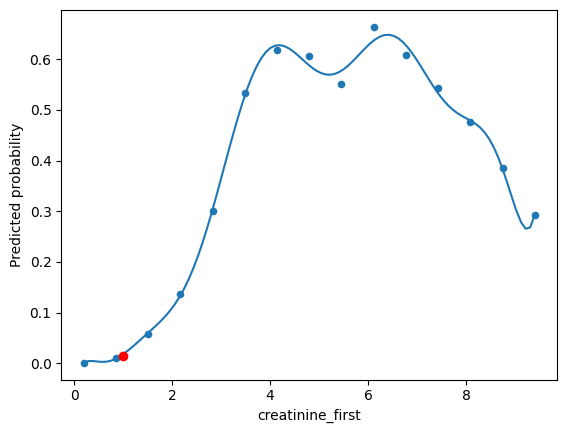

In [13]:
SingleVariableExplainer(
    underlying_model=model,
    training_dataset=train_X,
    target_variable='day_28_flg',
    explainable_variable='creatinine_first',
    explanation_point=train_X.iloc[0],
    number_samples=15
).plot()